In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator, get_single_color_func


stopwords = set(STOPWORDS)

from textblob import TextBlob

import re

from collections import Counter


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import warnings
warnings.filterwarnings("ignore")



In [ ]:
# Reading data
df=pd.read_csv('/tweeting.txt')
df.head()
df.drop(['Unnamed: 0'],axis=1,inplace= True)
df.head()

,created_at,text,favourites_count,retweet_count,sentiment,polarity
0,0.366667,interesting read four point strategy beyond co...,841,0,positive,0.333333
1,0.516667,china sneezed world freezed covid 19 chinesevi...,664,0,neutral,0.000000
2,0.550000,poor india starving public troubled epidemic c...,5134,1,negative,-0.300000
3,0.666667,stuck home safe home sitting lucknow rememberi...,230,0,positive,0.675000
4,0.833333,wish contribute little amount lovable pm s pm ...,5,0,positive,0.304167


In [ ]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity 
df['Subjectivity']=df['text'].apply(getSubjectivity)
df.head()

,created_at,text,favourites_count,retweet_count,sentiment,polarity,Subjectivity
0,0.366667,interesting read four point strategy beyond co...,841,0,positive,0.333333,0.516667
1,0.516667,china sneezed world freezed covid 19 chinesevi...,664,0,neutral,0.000000,0.000000
2,0.550000,poor india starving public troubled epidemic c...,5134,1,negative,-0.300000,0.555556
3,0.666667,stuck home safe home sitting lucknow rememberi...,230,0,positive,0.675000,0.750000
4,0.833333,wish contribute little amount lovable pm s pm ...,5,0,positive,0.304167,0.633333


In [ ]:
df.columns.tolist()


['created_at',
 'text',
 'favourites_count',
 'retweet_count',
 'sentiment',
 'polarity',
 'Subjectivity']

In [ ]:

df.head()

,created_at,text,favourites_count,retweet_count,sentiment,polarity,Subjectivity
0,0.366667,interesting read four point strategy beyond co...,841,0,positive,0.333333,0.516667
1,0.516667,china sneezed world freezed covid 19 chinesevi...,664,0,neutral,0.000000,0.000000
2,0.550000,poor india starving public troubled epidemic c...,5134,1,negative,-0.300000,0.555556
3,0.666667,stuck home safe home sitting lucknow rememberi...,230,0,positive,0.675000,0.750000
4,0.833333,wish contribute little amount lovable pm s pm ...,5,0,positive,0.304167,0.633333


In [ ]:
# check missing values
df.isna().sum()
#df.drop(['Unnamed: 0'],axis=1,inplace=True)


created_at          0
text                0
favourites_count    0
retweet_count       0
sentiment           0
polarity            0
Subjectivity        0
dtype: int64

In [ ]:
# data preprocessing
for i in range(df.shape[0]) :
    df['text'][i] = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(#[A-Za-z0-9]+)", " ", df['text'][i]).split()).lower()
df['text'].head()

0    interesting read four point strategy beyond co...
1    china sneezed world freezed covid 19 chinesevi...
2    poor india starving public troubled epidemic c...
3    stuck home safe home sitting lucknow rememberi...
4    wish contribute little amount lovable pm s pm ...
Name: text, dtype: object

In [ ]:
#Most favourite tweets
fav = df[['favourites_count','text']].sort_values('favourites_count',ascending = False)[:5].reset_index()
for i in range(5):
    print(i,']', fav['text'][i],'\n')

0 ] sake country please spell strategy vaccine medicine covid 19 

1 ] want credit want people country free covid 19 whether government believes will continue play role positive opposition keep giving suggestions ji rahulspeaksforindia 

2 ] economic slowdown country growing rapid pace covid19 employment situation deteriorating bjp government help poorest 20 people nyay scheme ji rahulspeaksforindia 

3 ] limbo right now write views covid 19 s impact economy business standard article read covid 19 

4 ] lockdown way solution covid19 lockdown pause button come lockdown virus going start work congress leader rahul gandhi rahulspeaksforindia 



In [ ]:
#Most retweeted tweets
retweet = df[['retweet_count','text']].sort_values('retweet_count',ascending = False)[:5].reset_index()
for i in range(5):
    print(i,']', retweet['text'][i],'\n')

0 ] 25 member team kottayam medical college part team treating 5 patients including 93 year old headed kasargod strengthening functioning state art covid hospital covid19 covidkerala keralafightscovid 

1 ] hunger wait join us mission protect vulnerable groups donate beatthevirus covid19 coronarelief 

2 ] one month fighting againt covid19 came strategic 

3 ] ajayks sant shri asharamji bapu established yuwa seva sangh mahila utthan mandal organizations provide food basic essentials poor peoples critical time coronaviruspandemic 

4 ] sober press conference covid19 blame game mode refrained blaming modi person ensured pc turn us vs match 



Text(0.5, 1.0, 'No. of Tweets per Hour')

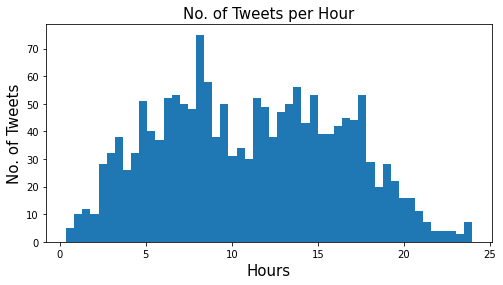

In [ ]:
#Number of Tweets per Hour
plt.figure(1, figsize=(8,4))
plt.hist(df["created_at"],bins = 50);
plt.xlabel('Hours',size = 15)
plt.ylabel('No. of Tweets',size = 15)
plt.title('No. of Tweets per Hour',size = 15)

In [ ]:
#Import image for word cloud visualization
from PIL import Image
char_mask = np.array(Image.open("/twitter.png"))    
image_colors = ImageColorGenerator(char_mask)

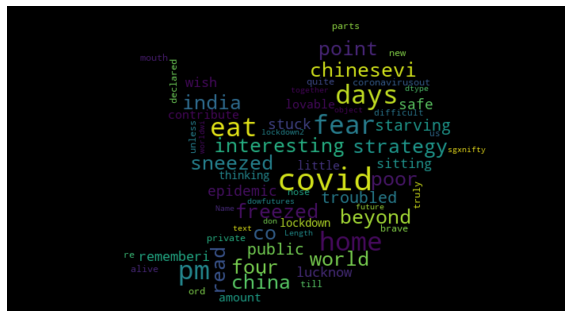

In [ ]:
def show_wordcloud(data , title = None):
    wordcloud = WordCloud(background_color='black',stopwords=stopwords,mask=char_mask,max_words=200,max_font_size=40).generate(str(data))
  
    fig = plt.figure(1, figsize=(10, 10))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(df['text'])

In [ ]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 'ours',
 '

In [ ]:
#Removing Stop Words
df['text'] = df['text'].apply(lambda tweets: ' '.join([word for word in tweets.split() if word not in stopwords]))
df['text'].head() 

0    interesting read four point strategy beyond co...
1    china sneezed world freezed covid 19 chinesevi...
2    poor india starving public troubled epidemic c...
3    stuck home safe home sitting lucknow rememberi...
4    wish contribute little amount lovable pm s pm ...
Name: text, dtype: object

In [ ]:
#Add sentiment column
df['sentiment'] = ' '
df['polarity'] = None
for i,tweets in enumerate(df.text) :
    blob = TextBlob(tweets)
    df['polarity'][i] = blob.sentiment.polarity
    if blob.sentiment.polarity > 0 :
        df['sentiment'][i] = 'positive'
    elif blob.sentiment.polarity < 0 :
        df['sentiment'][i] = 'negative'
    else :
        df['sentiment'][i] = 'neutral'
df.head()

,created_at,text,favourites_count,retweet_count,sentiment,polarity,Subjectivity
0,0.366667,interesting read four point strategy beyond co...,841,0,positive,0.333333,0.516667
1,0.516667,china sneezed world freezed covid 19 chinesevi...,664,0,neutral,0,0.000000
2,0.550000,poor india starving public troubled epidemic c...,5134,1,negative,-0.3,0.555556
3,0.666667,stuck home safe home sitting lucknow rememberi...,230,0,positive,0.675,0.750000
4,0.833333,wish contribute little amount lovable pm s pm ...,5,0,positive,0.304167,0.633333


positive    845
neutral     565
negative    251
Name: sentiment, dtype: int64


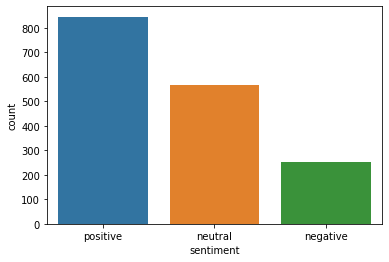

In [ ]:
#Count plot
print(df.sentiment.value_counts())
sns.countplot(x='sentiment', data = df);

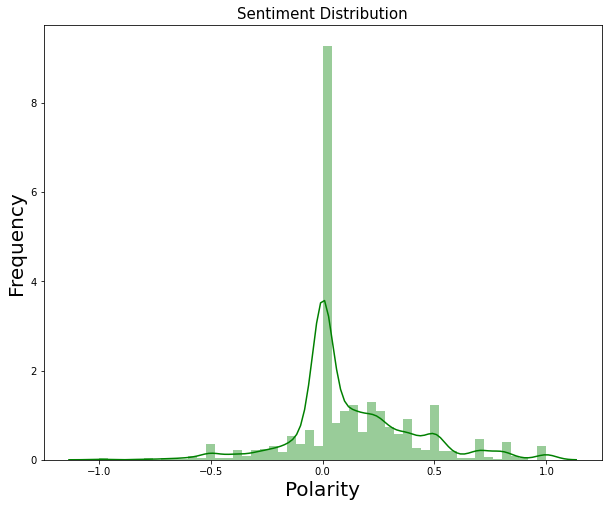

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(df['polarity'], bins=50,color='green')
plt.title('Sentiment Distribution',size = 15)
plt.xlabel('Polarity',size = 20)
plt.ylabel('Frequency',size = 20)
plt.show();

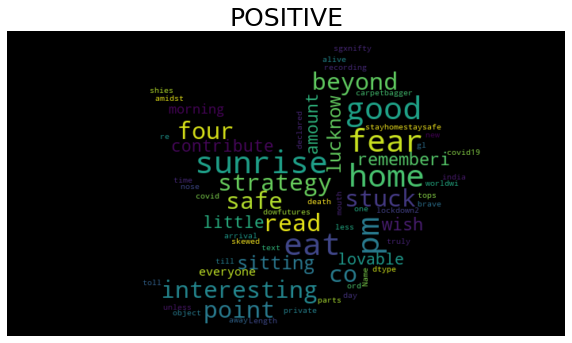

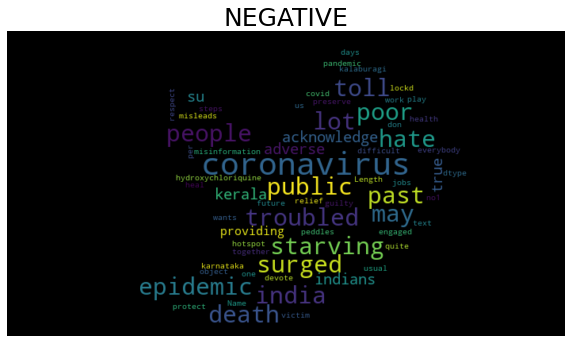

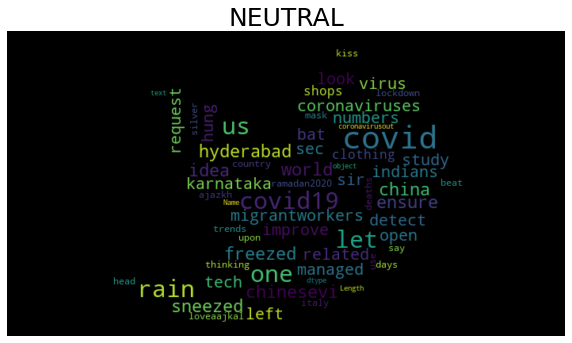

In [ ]:
pos = df['text'][df['sentiment'] == 'positive']
show_wordcloud(pos , 'POSITIVE')

neg = df['text'][df['sentiment'] == 'negative']
show_wordcloud(neg , 'NEGATIVE')

neutral = df['text'][df['sentiment'] == 'neutral']
show_wordcloud(neutral , 'NEUTRAL')

In [ ]:
count = pd.DataFrame(df.groupby('sentiment')['favourites_count'].sum())
count.head()

,favourites_count
sentiment,
negative,2111532
neutral,4026156
positive,7313998


In [ ]:
import collections
from collections import Counter
df['text'] = df['text'].apply(lambda tweets: ' '.join([word for word in tweets.split() if word.lower() not in stopwords]))

words = []

words = [word for i in df.text for word in i.split()]

In [ ]:
freq = Counter(words).most_common(30)
freq = pd.DataFrame(freq)
freq.columns = ['word', 'frequency']
freq.head()

,word,frequency
0,covid,841
1,19,755
2,covid19,569
3,coronavirus,402
4,lockdown,302


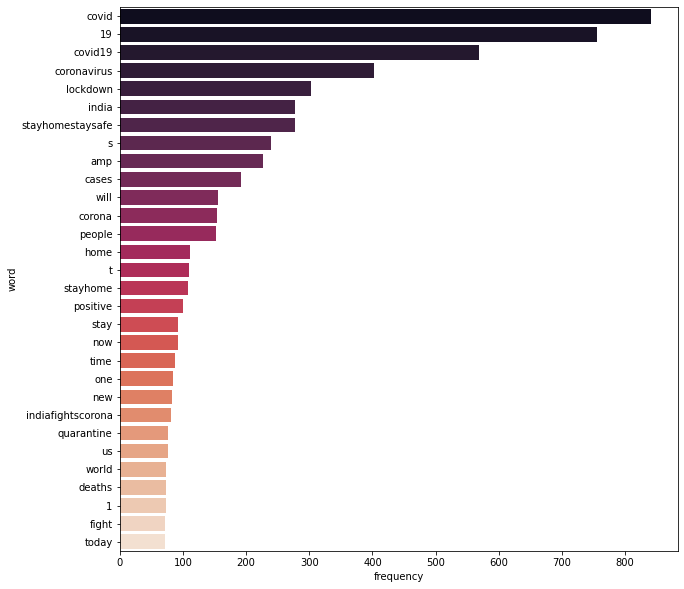

In [ ]:
plt.figure(figsize = (10, 10))
sns.barplot(y="word", x="frequency",data=freq,palette='rocket');

In [ ]:
# Bokeh Libraries
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
output_notebook()


In [ ]:
#create figure
p = figure(plot_width=1000, plot_height=600,x_axis_label='Date',title='Sentiment Analysis')
p.title.text_font_size = '20pt'
p.xaxis.axis_label_text_font_size = "20pt"

# add a circle renderer with a size, color, and alpha
p.circle(df['created_at'], df['polarity'], size=15, color="navy", alpha=0.2)
p.circle(df['created_at'],df['Subjectivity'],size=15, color="orange", alpha=0.2)

# show the results
show(p)

In [ ]:
p = figure(plot_width = 1000, plot_height = 400,x_axis_label='Hour',y_axis_label='Favourite count') 
p.line(df['created_at'], df['favourites_count'],  
        line_width = 2, color = "red") 
show(p)
  


6.0
4.0


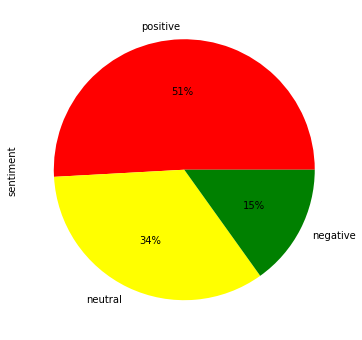

In [ ]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size
df.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])


In [ ]:
X = df.drop(['created_at','text', 'sentiment','favourites_count','retweet_count'], axis=1)
y = df['sentiment']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(1661, 2)
(1661,)


In [ ]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


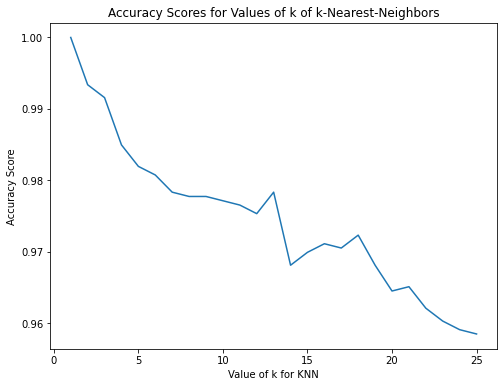

In [ ]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [ ]:
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.9223359422034919


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(996, 2)
(996,)
(665, 2)
(665,)


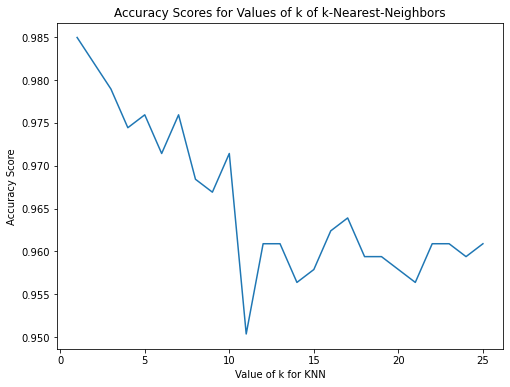

In [ ]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9203007518796993


In [ ]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X, y)

# make a prediction for an example of an out-of-sample observation
knn.predict([[0.6,0.75]])

array(['positive'], dtype=object)

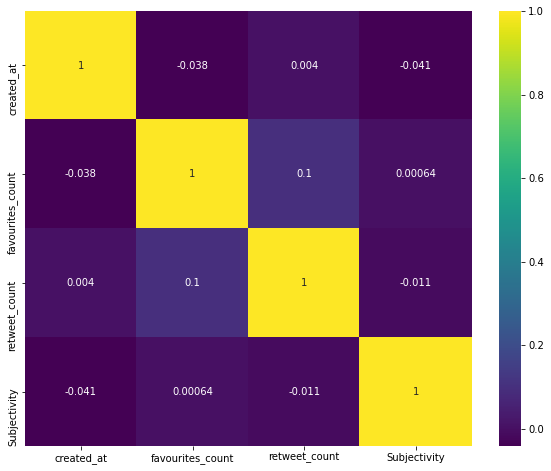

In [ ]:
import seaborn as sns
import pandas as pd
corr = df.corr()
plt.figure(figsize=(10,8)) 
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap='viridis', annot=True)
plt.show()

In [ ]:
#Train and test model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model = model.fit(X_train ,y_train)
y_model = model.predict(X_test)
y_model

array(['positive', 'neutral', 'positive', 'negative', 'negative',
       'neutral', 'positive', 'positive', 'neutral', 'neutral',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'neutral', 'positive', 'positive', 'negative', 'neutral',
       'positive', 'neutral', 'neutral', 'neutral', 'neutral', 'positive',
       'neutral', 'neutral', 'positive', 'positive', 'positive',
       'positive', 'positive', 'negative', 'positive', 'positive',
       'negative', 'neutral', 'positive', 'positive', 'negative',
       'neutral', 'positive', 'neutral', 'neutral', 'neutral', 'negative',
       'positive', 'neutral', 'neutral', 'positive', 'neutral',
       'negative', 'positive', 'positive', 'negative', 'negative',
       'positive', 'positive', 'positive', 'positive', 'neutral',
       'negative', 'positive', 'neutral', 'negative', 'neutral',
       'negative', 'neutral', 'positive', 'neutral', 'positive',
       'positive', 'neutral', 'positive', 'positive', 'positive

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model) 

0.968421052631579

In [ ]:
from sklearn import metrics

# make predictions
expected = y_test
predicted = y_model
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

    negative       1.00      0.79      0.88       100
     neutral       1.00      1.00      1.00       215
    positive       0.94      1.00      0.97       350

    accuracy                           0.97       665
   macro avg       0.98      0.93      0.95       665
weighted avg       0.97      0.97      0.97       665

[[ 79   0  21]
 [  0 215   0]
 [  0   0 350]]
